In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headway = pd.read_csv('../data/Headway Data.csv')

In [3]:
avg_adherence = headway[['ROUTE_ABBR', 'TRIP_EDGE', 'ADHERENCE']]
avg_adherence

,ROUTE_ABBR,TRIP_EDGE,ADHERENCE
0,7,1,-2.000000
1,7,0,-3.350000
2,7,2,-20.183333
3,50,1,-0.283333
4,50,2,10.016666
...,...,...,...
1981710,50,2,-2.733333
1981711,50,1,12.900000
1981712,50,2,26.733333
1981713,56,1,0.966666


In [4]:
avg_adherence['ADHERENCE'] = avg_adherence['ADHERENCE'].abs()

/var/folders/g7/6tnzkjxn417cqx2nnc600wb40000gn/T/ipykernel_2715/4054821087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_adherence['ADHERENCE'] = avg_adherence['ADHERENCE'].abs()


In [5]:
avg_adherence = avg_adherence.groupby(["ROUTE_ABBR", "TRIP_EDGE"])["ADHERENCE"].mean()
avg_adherence

ROUTE_ABBR  TRIP_EDGE
3           0            2.903688
            1            2.688117
            2            3.661309
7           0            2.971901
            1            2.643688
            2            3.953377
22          0            2.757751
            1            2.175478
            2            3.557785
23          0            2.288425
            1            2.178312
            2            2.967317
50          0            2.868740
            1            2.662366
            2            3.226389
52          0            3.124765
            1            2.673703
            2            3.756044
55          0            3.680916
            1            2.598785
            2            4.334734
56          0            2.886356
            1            2.198179
            2            3.648868
Name: ADHERENCE, dtype: float64

In [6]:
adherence = pd.DataFrame(data=avg_adherence)
adherence

ADHERENCE
ROUTE_ABBR TRIP_EDGE           
3          0           2.903688
           1           2.688117
           2           3.661309
7          0           2.971901
           1           2.643688
           2           3.953377
22         0           2.757751
           1           2.175478
           2           3.557785
23         0           2.288425
           1           2.178312
           2           2.967317
50         0           2.868740
           1           2.662366
           2           3.226389
52         0           3.124765
           1           2.673703
           2           3.756044
55         0           3.680916
           1           2.598785
           2           4.334734
56         0           2.886356
           1           2.198179
           2           3.648868

In [7]:
adherence.reset_index(inplace=True)
adherence

,ROUTE_ABBR,TRIP_EDGE,ADHERENCE
0,3,0,2.903688
1,3,1,2.688117
2,3,2,3.661309
3,7,0,2.971901
4,7,1,2.643688
5,7,2,3.953377
6,22,0,2.757751
7,22,1,2.175478
8,22,2,3.557785
9,23,0,2.288425


In [10]:
sns.set_theme(style='whitegrid', palette='Paired', font='ariel', font_scale=1, color_codes=True, rc=None)

findfont: Font family ['ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['ariel'] not found. Falling back to DejaVu Sans.


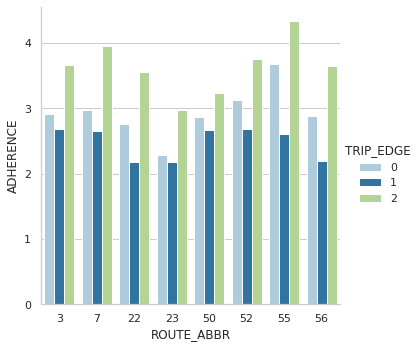

In [12]:
g = sns.catplot(
    data=adherence, kind="bar",
    x="ROUTE_ABBR", y="ADHERENCE", hue="TRIP_EDGE")

In [ ]:
# def catergorise(row):
#     if row['ADHERENCE'] > 0:
#         return 'early'
#     elif row['ADHERENCE'] < 0:
#         return 'late'
#     elif row['ADHERENCE'] == 0:
#         return 'on time'
#     return 'null'

In [ ]:
#avg_adherence['on time'] = avg_adherence.apply(lambda row: catergorise(row),axis=1)

In [ ]:
#on_time_count = avg_adherence.groupby(["ROUTE_ABBR", "TRIP_EDGE", "on time"])["on time"].count()
#on_time_count

In [ ]:
#on_time_count = on_time_count.dropna()